In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V1a
Data: Computational
Operators: Only log
Maxdepth and maxsize: Not included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################

In [4]:
len(T_mock_arr), T_mock_arr

(10000, array([2000, 3000, 1500, ..., 4000,  750, 3000]))

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))



In [8]:
print(P_min_arr)

[ 0.58752015  1.20040864  3.46414101  7.72864346 27.03831683 79.19938235]


In [9]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [10]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [11]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
        ],
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [12]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.790e+04
Head worker occupation: 6.8%
Progress: 44 / 600 total iterations (7.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.215e+01  1.594e+01  y = x₀
2           3.823e+01  4.858e-01  y = log(x₁)
3           3.367e+01  1.270e-01  y = 5.9828 - x₀
4           1.314e+01  9.412e-01  y = -5.5425 * log(x₀)
6           1.263e+01  1.965e-02  y = (-5.5425 * log(x₀)) + x₀
8           1.201e+01  2.545e-02  y = (log(x₀) * (-5.5425 + x₀)) + x₀
10          1.016e+01  8.360e-02  y = -0.77236 + (((x₀ - log(x₀)) + -0.77236) / 0.10701)
11          8.891e+00  1.331e-01  y = log(x₀) + (((x₀ - log(x₀)) + -0.77236) / 0.10701)
12          6.366e+00  3.341e-01  y = (log(0.0041231 * x₁) / (x₀ + (-0.60593 - -0.67003))) + x₀
14          6.365e+00  6.473e-05  y = (log((x₁ - -0.67003) * 0.0041231) / ((-0.60593 - -0.67003)...
                          

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          1.6187607   
	1         0.349146                                     log(179.90756)   
	2         0.544485                                     0.6933409 / x0   
	3         0.449853                               -5.5425334 * log(x0)   
	4         0.021154                         (log(x0) * -5.393107) + x0   
	5         0.340112               (1.6029195 / (0.03869484 + x0)) + x0   
	6         0.001532          x0 + (log(5.1926236) / (0.03992894 + x0))   
	7         0.216424   (-5.5425334 * log(x0)) + (-0.26708966 / log(x0))   
	8         0.158651  (log(x1 * 0.0054697553) / (0.05614697 + x0)) *...   
	9         0.056497  (log(x1 * 0.005763049) / (x0 + 0.05650346)) + ...   
	10        0.037326  (log(log(x1)) / (0.05614697 + x0)) - (0.106584...   
	11        0.695541  (log(0.004123067 * x1) / (x0 + 0.05614697)) + ...   
	12  >>>>  0.483195  ((log(x1 * 0.0054697553) / (0.05614697 + x0)) ...   
	13        0.071901  (((log(0.0086361235 * x1) / (x0 + 0.0736049)) ...   
	14        0.024627  ((-2.6030293 + (-0.29567704 / log(x0))) + (log...   
	15        0.022623  ((-0.27314904 / log(x0)) + (log(0.0054697553 *...   
	
	         loss  complexity  
	0   50.350450           1  
	1   35.511673           2  
	2   20.601750           3  
	3   13.138190           4  
	4   12.593929           6  
	5    8.962983           7  
	6    8.949258           8  
	7    7.207674           9  
	8    6.150264          10  
	9    5.812426          11  
	10   5.599468          12  
	11   2.793040          13  
	12   1.062624          15  
	13   0.920296          17  
	14   0.876065          19  
	15   0.856469          20  
]

In [13]:
# Access the chosen best fit equation
model.equations_
eqn_num = 12

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_2814888/2074797730.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = ((log(x1 * 0.0054697553) / (0.05614697 + x0)) + (-0.27314904 / log(x0))) - 1.9231359


In [14]:
 model.equations_.sympy_format[eqn_num]

-1.9231359 - 0.27314904/log(x0) + log(0.0054697553*x1)/(x0 + 0.05614697)

In [15]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

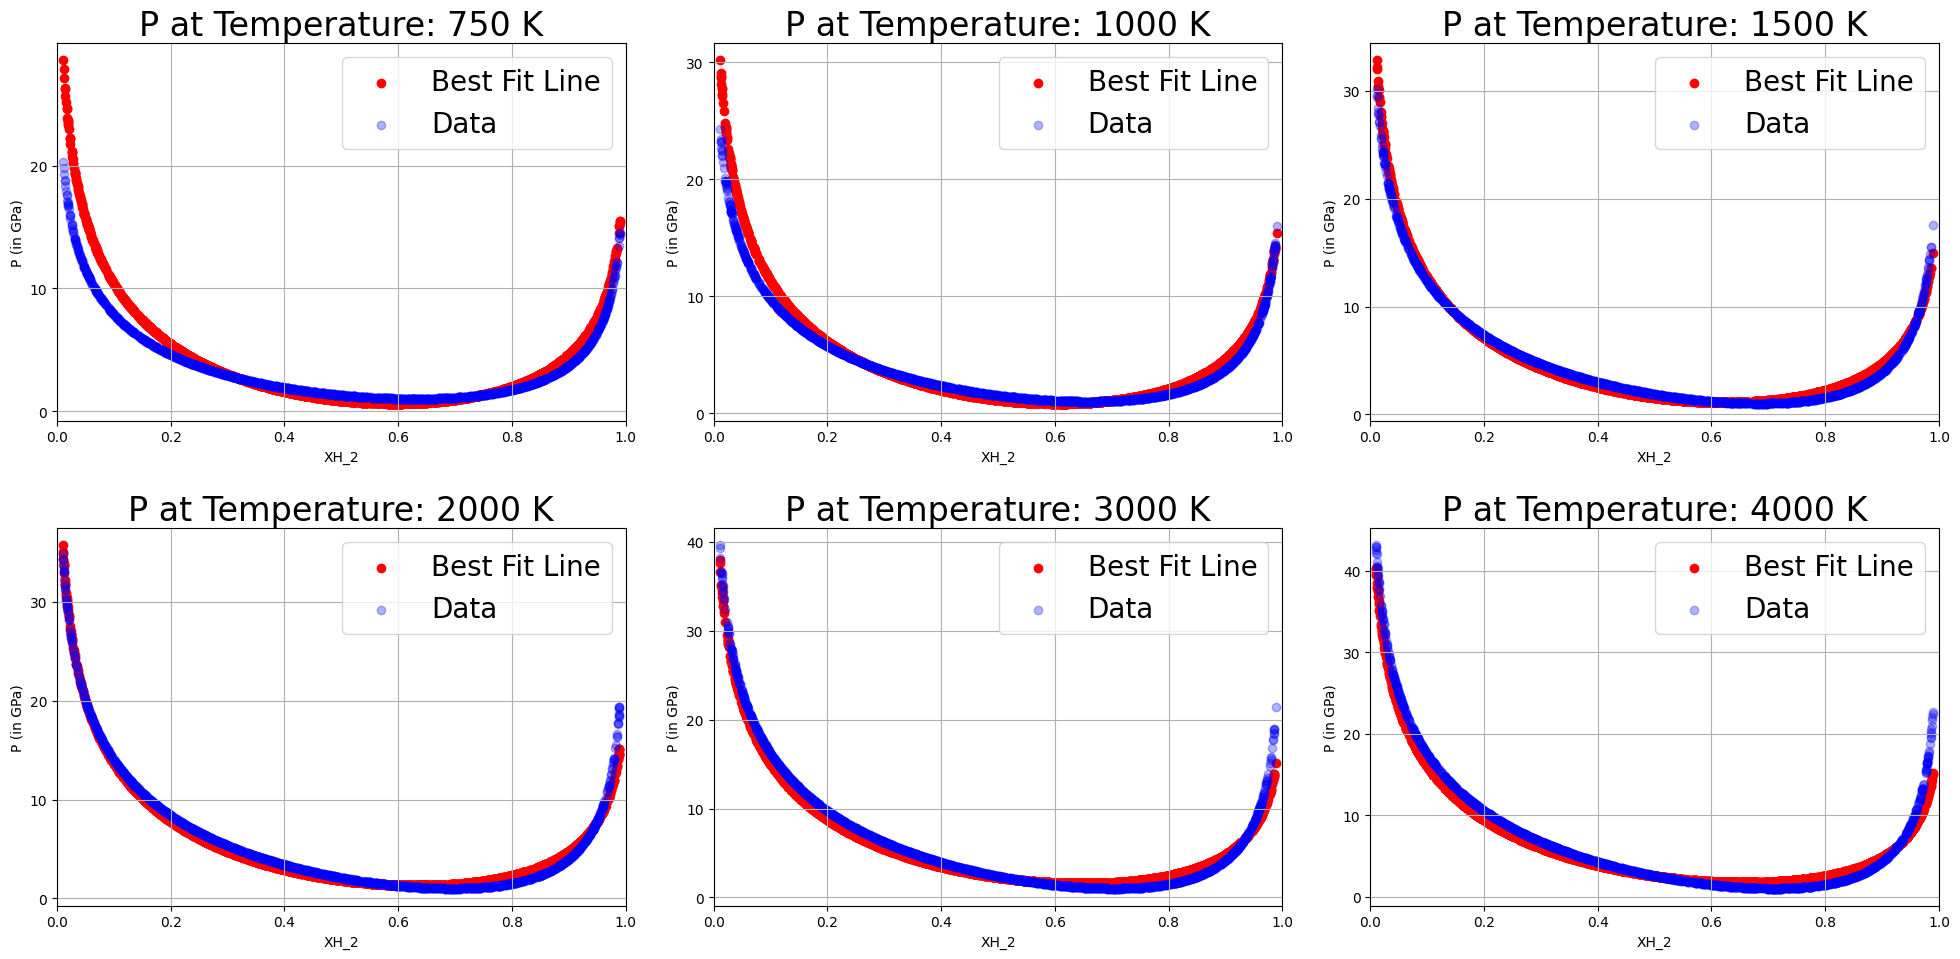

In [16]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = ((0.8113427 - ((1.4600017 * np.log(x0)) * np.log(x1))) + (np.log(-6.266404 * np.log(x0)) * -5.026394)) - -0.7171188

    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel('XH_2')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()